
# Problem Statement:


A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

Also, we are looking forward to determine the optimal value of lambda for ridge and lasso regression.

Our Business Goal 

Constructing a model to estimate house prices using the available independent variables will enable management to gain a thorough understanding of how these prices vary with different variables. Based on this understanding, the firm can adjust its strategy and focus on areas that are likely to generate high returns. Additionally, this model will provide valuable insights into the pricing dynamics of a new market, enabling management to make informed decisions.

In [133]:
#Importing required libraries
import pandas as pd # data manipulation and analysis library
import numpy as np # numerical computing library
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # data visualization library
import sklearn # machine learning library
import sweetviz as sv # EDA library
import warnings # library for suppressing warnings

#Feature selection
from sklearn.feature_selection import VarianceThreshold # for removing low-variance features

#Data preprocessing
from sklearn.model_selection import train_test_split # for splitting data into training and testing sets
from sklearn.preprocessing import RobustScaler, MinMaxScaler # for feature scaling

#Model selection and evaluation
from sklearn.model_selection import GridSearchCV # for hyperparameter tuning using cross-validation
from sklearn.linear_model import Ridge, Lasso # for ridge and lasso regression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # for evaluating model performance

#Suppress warnings
warnings.filterwarnings('ignore')

# Data Loading and Understanding
The data dictionary provides information about the different variables in the dataset. Each variable in the dataset is described in detail along with its data type and possible values. The variables are grouped based on their characteristics such as the type of dwelling, zoning classification, lot size, etc. Some variables have a large number of possible values, while others have only a few. The data dictionary is an important resource for understanding the variables and their role in the analysis.

In [134]:
# Reading data from csv
df= pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [135]:
# Checking shape
df.shape

(1460, 81)

In [136]:
# Checking dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [137]:
# Checking descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


# Data Cleansing 


### Performing a check for missing values and implementing imputation techniques.

In [138]:
## Checking percentage of missing values
miss_vals= round(df.isna().sum() * 100/df.shape[0], 2)
miss_vals[miss_vals > 0].sort_values(ascending= False)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

Out of the 19 columns, PoolQC, MiscFeature, Alley, Fence, FireplaceQu, and LotFrontage have a high percentage of missing values. For instance, PoolQC has 99.52% missing values, MiscFeature has 96.30%, Alley has 93.77%, Fence has 80.75%, FireplaceQu has 47.26%, and LotFrontage has 17.74%. Before imputing the missing values, it is essential to determine whether these missing values are due to any business logic. In case NaN values indicate any business logic, they can be imputed using the same logic. However, if there is no business logic behind missing values, statistical imputation methods can be employed post-train-test split. Additionally, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, BsmtExposure, BsmtFinType2, BsmtFinType1, BsmtCond, BsmtQual, MasVnrArea, MasVnrType, and Electrical also have missing values, but with lower percentages.

In [139]:
# Obtaining the names of columns that contain missing values.
miss_val_cols= miss_vals[miss_vals > 0].sort_values(ascending= False).index
miss_val_cols

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',
       'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
       'MasVnrArea', 'MasVnrType', 'Electrical'],
      dtype='object')

In [140]:
# Checking the distinct values in these columns.

for col in df.columns[df.isna().any()]:
    print('\nColumn List:',col)
    print(df[col].fillna('missing').value_counts())


Column List: LotFrontage
missing    259
60.0       143
70.0        70
80.0        69
50.0        57
          ... 
137.0        1
38.0         1
33.0         1
150.0        1
46.0         1
Name: LotFrontage, Length: 111, dtype: int64

Column List: Alley
missing    1369
Grvl         50
Pave         41
Name: Alley, dtype: int64

Column List: MasVnrType
None       864
BrkFace    445
Stone      128
BrkCmn      15
missing      8
Name: MasVnrType, dtype: int64

Column List: MasVnrArea
0.0        861
missing      8
72.0         8
108.0        8
180.0        8
          ... 
562.0        1
89.0         1
921.0        1
762.0        1
119.0        1
Name: MasVnrArea, Length: 328, dtype: int64

Column List: BsmtQual
TA         649
Gd         618
Ex         121
missing     37
Fa          35
Name: BsmtQual, dtype: int64

Column List: BsmtCond
TA         1311
Gd           65
Fa           45
missing      37
Po            2
Name: BsmtCond, dtype: int64

Column List: BsmtExposure
No         953
Av  

# NaN values for features
such as 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', and 'BsmtQual' in the dataset denote that these features are not present for the house. Hence, we will replace these NaN values with 'Not Present'. For the remaining columns, we will examine their relationship with other columns in the observed data to determine if we can use that relationship to impute the NaN values. These columns include 'LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'MasVnrType', and 'Electrical'.


In [141]:
# Replacing NaN with 'Absent' for below columns
cols_nan_v= ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']
df[cols_nan_v]= df[cols_nan_v].fillna('Absent')

In [142]:
# Checking percentage of missing values again
miss_vals= round(df.isna().sum() * 100/df.shape[0], 2)
miss_vals[miss_vals > 0].sort_values(ascending= False)

LotFrontage    17.74
GarageYrBlt     5.55
MasVnrType      0.55
MasVnrArea      0.55
Electrical      0.07
dtype: float64

In [143]:
# Examining the potential relationship between GarageYrBlt and GarageType
df[df.GarageYrBlt.isna()]['GarageType'].value_counts(normalize= True)

Absent    1.0
Name: GarageType, dtype: float64

#After imputing missing values
#of GarageType with 'Not Available', GarageYrBlt had NaN values only when GarageType was 'Not Available'. This suggests #that if a garage is absent, there will be no GarageYrBlt value, so it is safe to impute the NaN values 
#of GarageYrBlt with 0.

In [144]:
# Filling missing values in the 'GarageYrBlt' column with 0 as there is no 'GarageYrBlt' 
#value for observations where the GarageType is 'Not Available'. This indicates that if the garage 
# is not available, the 'GarageYrBlt' value will be 0
df['GarageYrBlt']= df['GarageYrBlt'].fillna(0)

# Converting Data

In [145]:
# Convert data type of MSSubClass
df['MSSubClass']= df['MSSubClass'].astype('object')

# EDA


AutoEDA with SweetViz is being used to visualize and explore the 81 attributes in the dataset. The attributes that have a high correlation coefficient with the target variable will then be manually explored.


### Auto EDA

In [146]:
import sweetviz as sv

# Analyzing the dataframe with SweetViz
report = sv.analyze(df)

# Saving the report to a PDF file

report.show_html('report.html')
# Saving the file to PDF to visualize the data in a PDF format within a Jupyter notebook
# Using IPython to show pdf report 
from IPython.display import IFrame
IFrame('report.pdf', width=700, height=600)

                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# NUMERICAL ASSOCIATIONS
(PEARSON, -1 to 1)
MasVnrArea
-0.05
3SsnPorch
-0.05
LowQualFinSF
-0.04
LotArea
-0.03
WoodDeckSF
-0.03
TotRmsAbvGrd
0.03
YearRemodAdd
-0.02
SalePrice
-0.02
MoSold
0.02
GarageArea
0.02
TotalBsmtSF
-0.02
GarageYrBlt
0.01
YearBuilt
-0.01
LotFrontage
-0.01

# CATEGORICAL ASSOCIATIONS
(CORRELATION RATIO, 0 to 1)
Neighborhood
0.14
MSSubClass
0.10
PoolArea
0.09
HouseStyle
0.08
BsmtFinType2
0.08
Electrical
0.08
SaleType
0.08
Exterior2nd
0.08
Exterior1st
0.08
RoofMatl
0.08
Condition2
0.07
RoofStyle
0.07
Heating
0.07
OverallCond
0.07




In [147]:
df_1 = df.copy()

### Visualizing numeric variables:

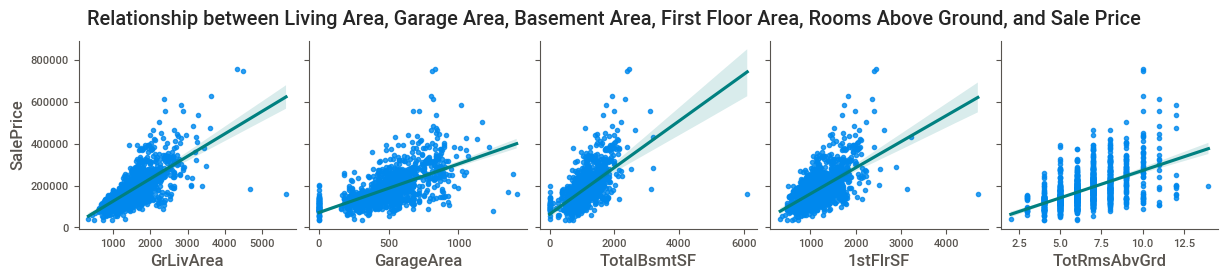

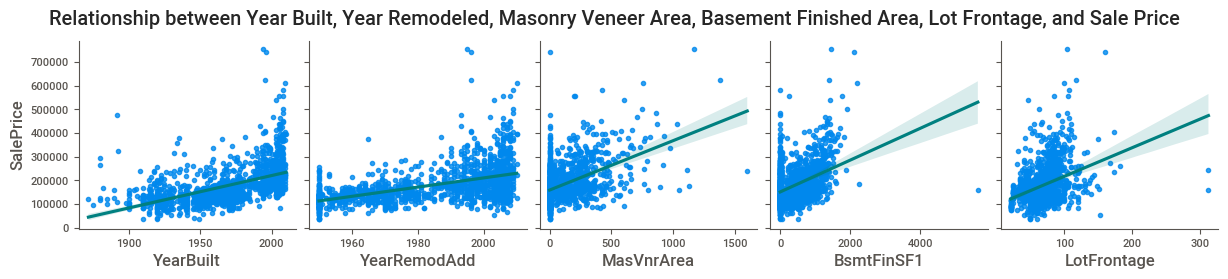

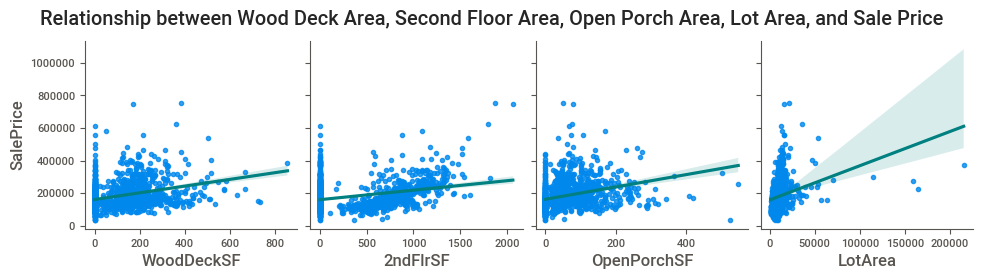

In [148]:
# Visualizing the relationship between the numeric variables and SalePrice can be done using a scatter plot
#num_columns= ['GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','TotRmsAbvGrd','YearBuilt','YearRemodAdd','MasVnrArea',
           #'BsmtFinSF1','LotFrontage','WoodDeckSF','2ndFlrSF','OpenPorchSF','LotArea']


pairplot1 = sns.pairplot(df, x_vars=['GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','TotRmsAbvGrd'], y_vars='SalePrice',
             kind= 'reg', plot_kws={'line_kws':{'color':'teal'}})
pairplot1.fig.suptitle("Relationship between Living Area, Garage Area, Basement Area, First Floor Area, Rooms Above Ground, and Sale Price", y=1.08)


pairplot2 = sns.pairplot(df, x_vars=['YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','LotFrontage'], y_vars='SalePrice', 
             kind= 'reg', plot_kws={'line_kws':{'color':'teal'}})
pairplot2.fig.suptitle("Relationship between Year Built, Year Remodeled, Masonry Veneer Area, Basement Finished Area, Lot Frontage, and Sale Price", y=1.08)


pairplot3 = sns.pairplot(df, x_vars=['WoodDeckSF','2ndFlrSF','OpenPorchSF','LotArea'], y_vars='SalePrice', kind= 'reg',
             plot_kws={'line_kws':{'color':'teal'}})
pairplot3.fig.suptitle("Relationship between Wood Deck Area, Second Floor Area, Open Porch Area, Lot Area, and Sale Price", y=1.08)

plt.show()

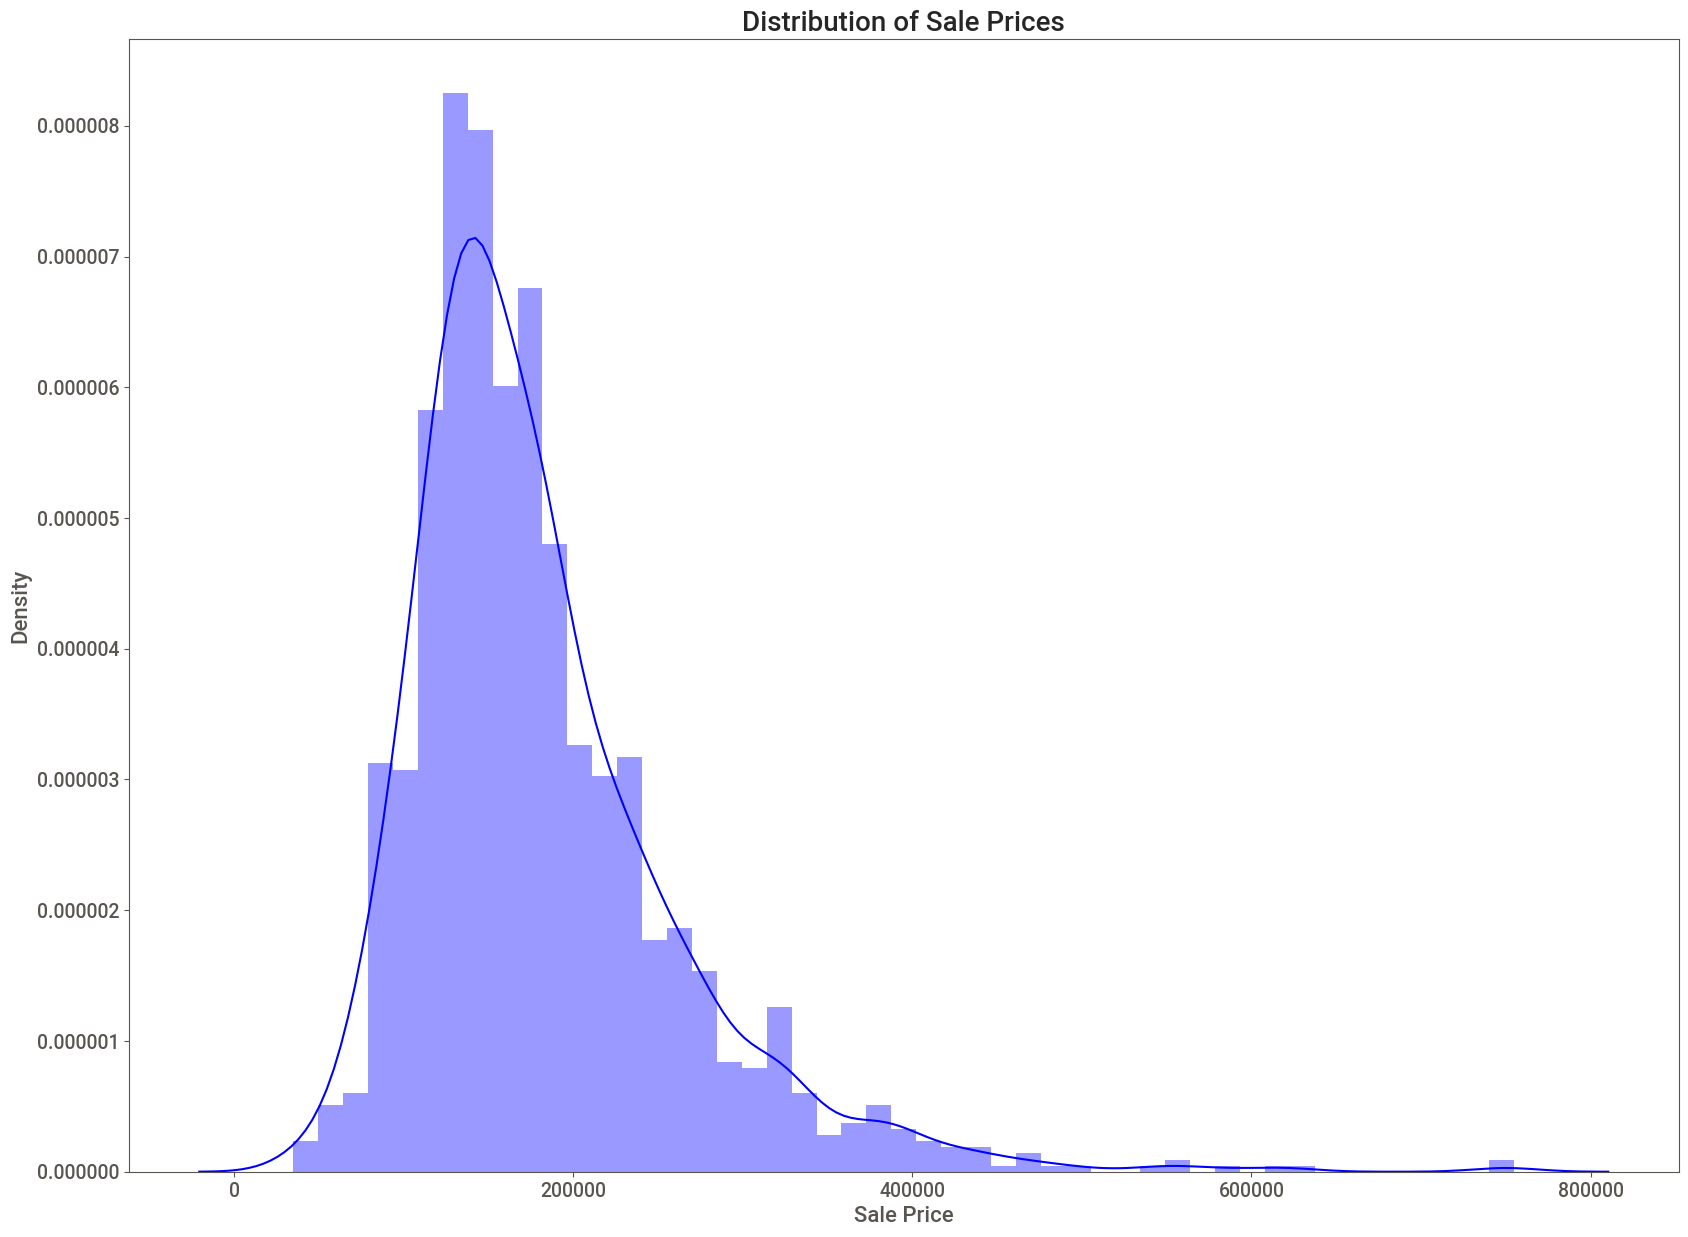

In [149]:
# Distribution of Sale Prices
plt.figure(figsize=(20, 15))
sns.distplot(df['SalePrice'], color='blue')
plt.title("Distribution of Sale Prices", fontsize=20, fontweight='bold')
plt.xlabel("Sale Price", fontsize=16)
plt.ylabel("Density", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Visualizing categorical variables:

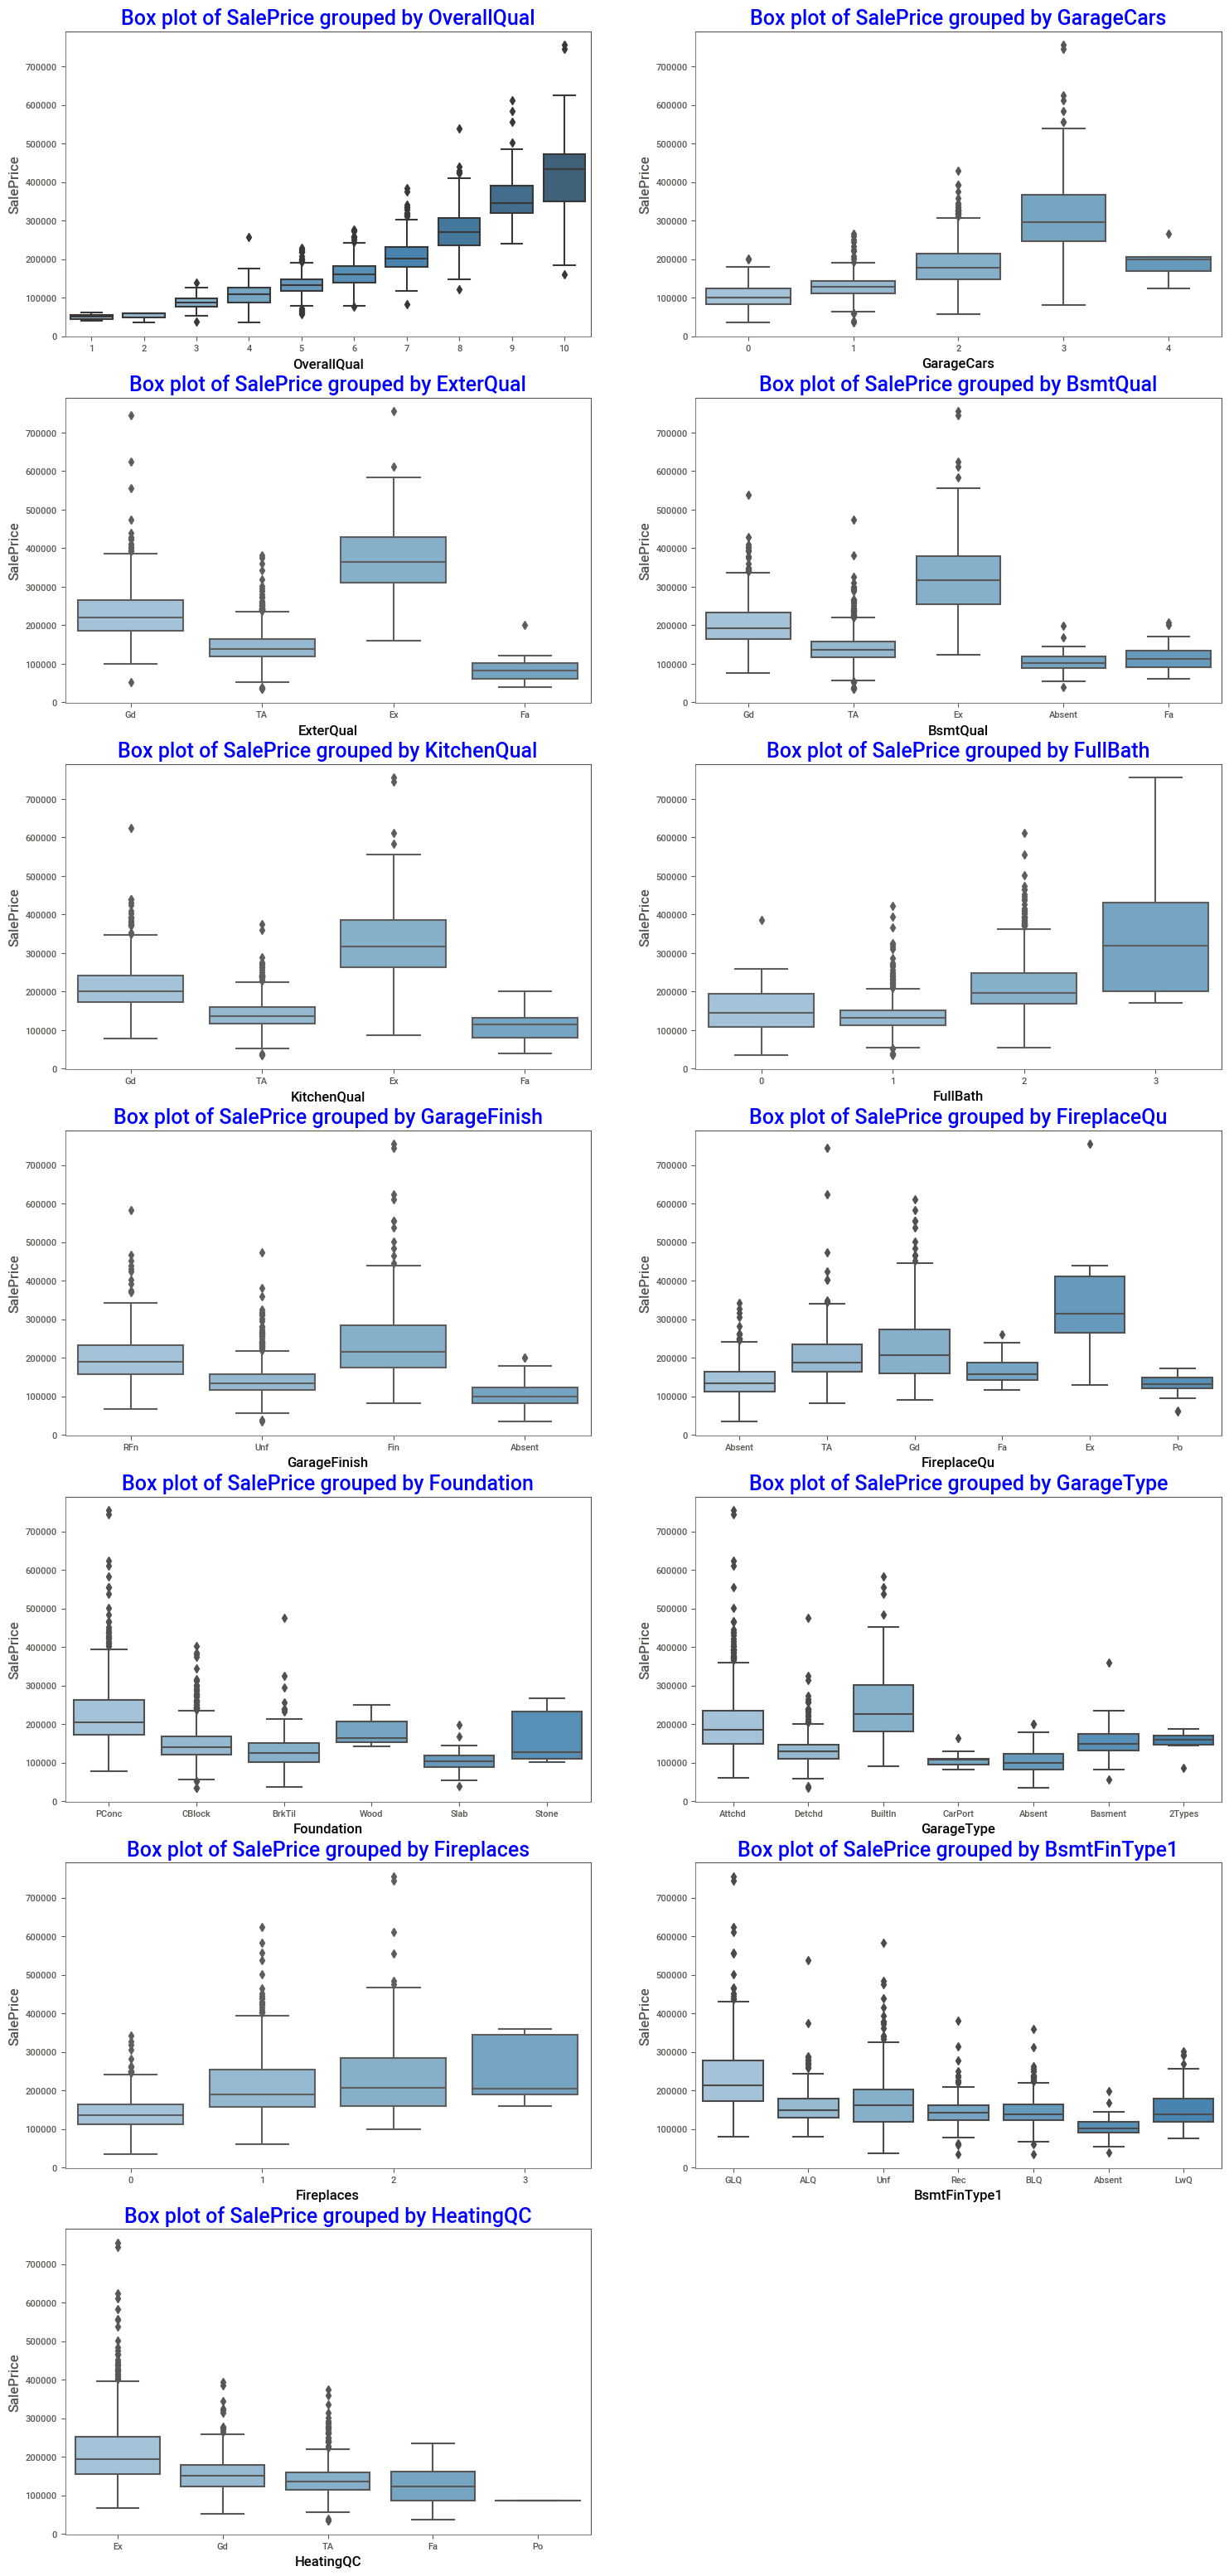

In [150]:
# Box plot of catego
# Define color palette
cat_columns = ['OverallQual', 'GarageCars', 'ExterQual', 'BsmtQual', 'KitchenQual', 'FullBath', 'GarageFinish', 'FireplaceQu', 
               'Foundation', 'GarageType', 'Fireplaces', 'BsmtFinType1', 'HeatingQC']
colors = sns.color_palette("Blues_d", len(cat_columns))



plt.figure(figsize=[18, 40])

for i, col in enumerate(cat_columns, 1):
    plt.subplot(7,2,i)
    title_text = f'Box plot of SalePrice grouped by {col}'
    x_label = f'{col}'
    fig = sns.boxplot(data=df, x=col, y='SalePrice', palette=colors)
    fig.set_title(title_text, fontdict={'fontsize': 18, 'color': 'blue'})
    fig.set_xlabel(x_label, fontdict={'fontsize': 12, 'color': 'black'})
    fig.spines['bottom'].set_color('grey')
    fig.spines['left'].set_color('grey')
plt.show()

<Figure size 2000x800 with 0 Axes>

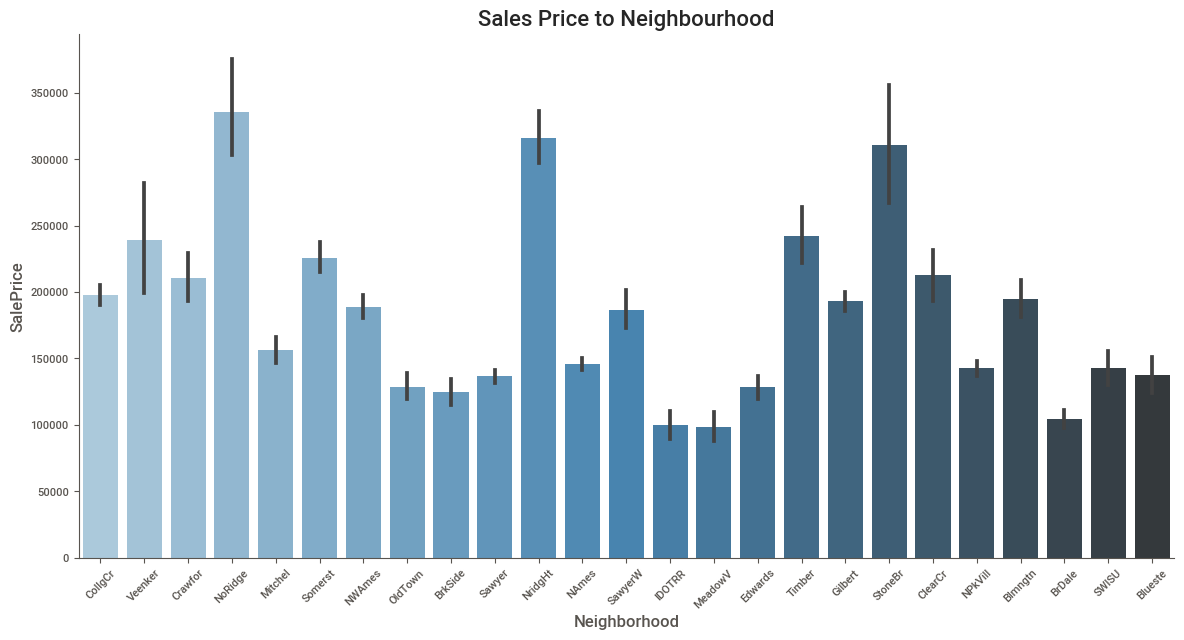

In [151]:

# Visualizing the Relationship between Neighborhood and Sale Price using a Bar Plot
plt.figure(figsize=(20, 8))
sns.catplot(x="Neighborhood", y="SalePrice", kind="bar", data=df, height=6, aspect=2, palette="Blues_d")
plt.title("Sales Price to Neighbourhood", fontsize=16)
plt.xticks(rotation=45)
plt.show()

<Figure size 2000x800 with 0 Axes>

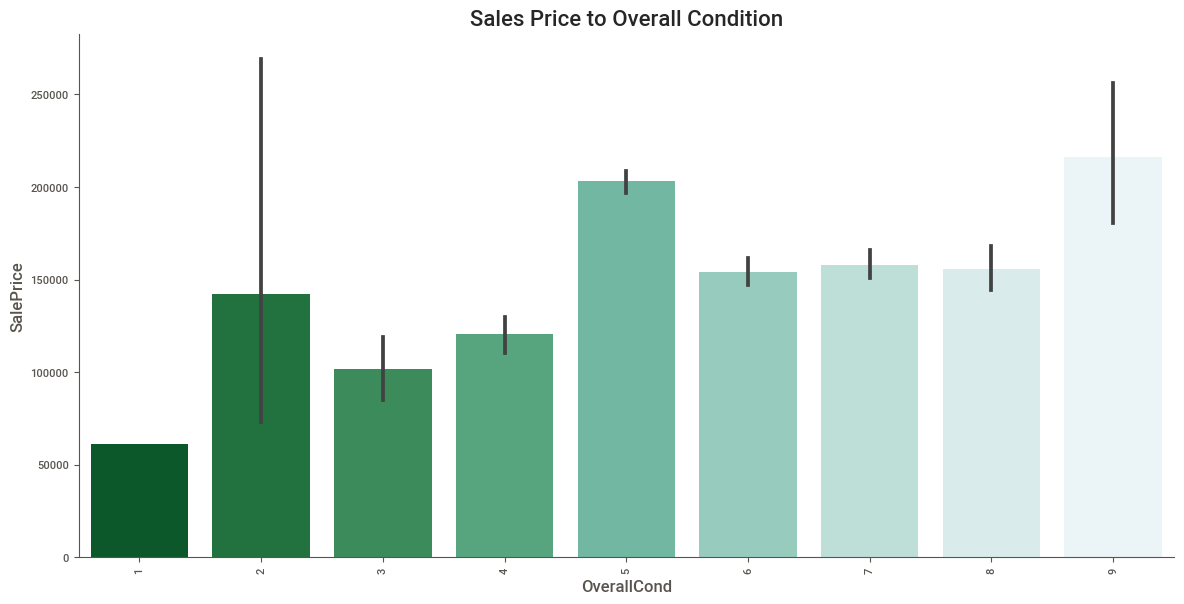

In [152]:

plt.figure(figsize=(20, 8))
sns.catplot(x="OverallCond", y="SalePrice", kind="bar", data=df, height=6, aspect=2, palette="BuGn_r")
plt.title("Sales Price to Overall Condition", fontsize=16)
plt.xticks(rotation=90)
plt.show()

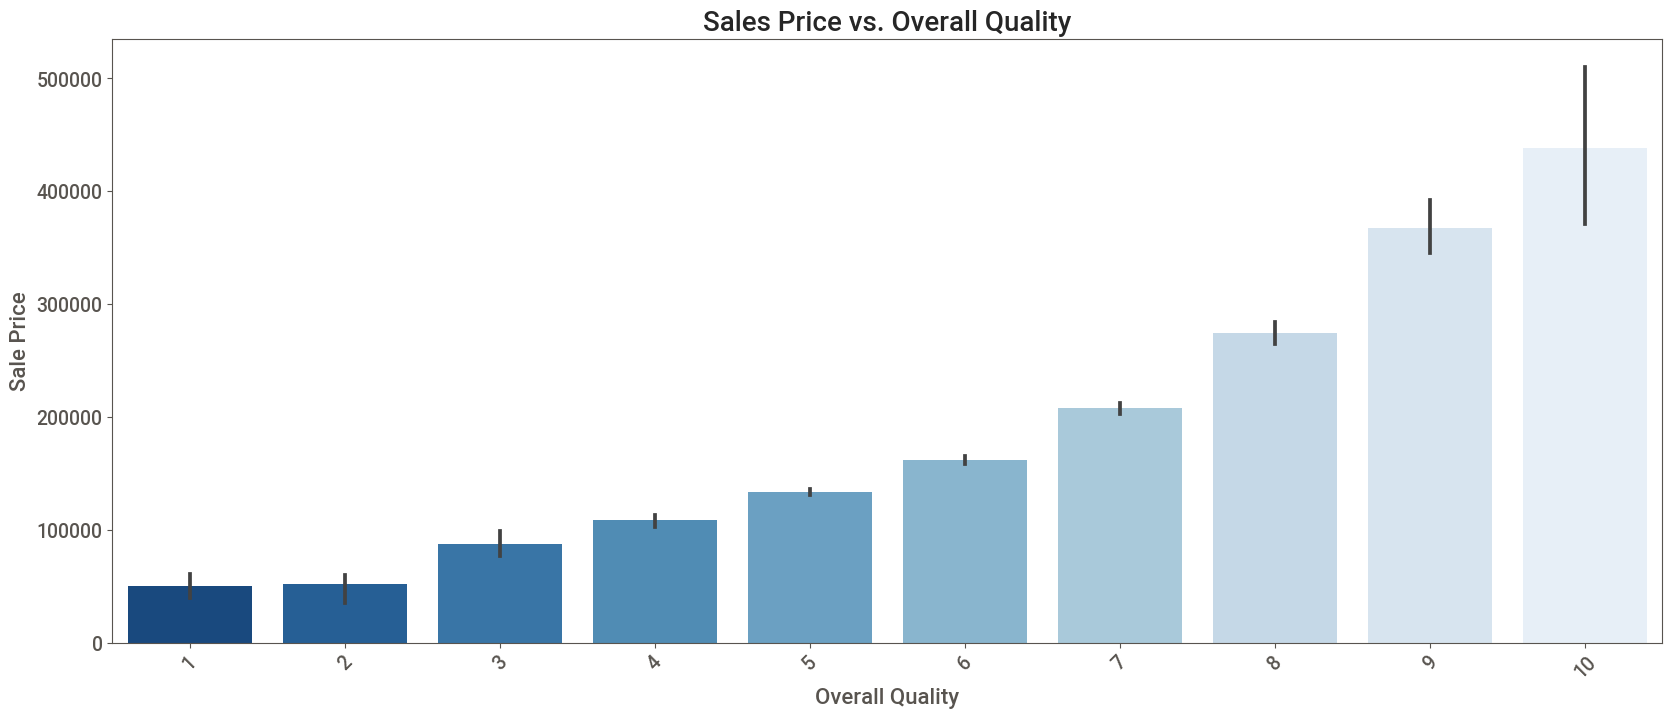

In [153]:
#Sales Price vs. Overall Quality
plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data=df, palette="Blues_r")
plt.title("Sales Price vs. Overall Quality", fontsize=20, fontweight='bold')
plt.xlabel("Overall Quality", fontsize=16)
plt.ylabel("Sale Price", fontsize=16)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.show()

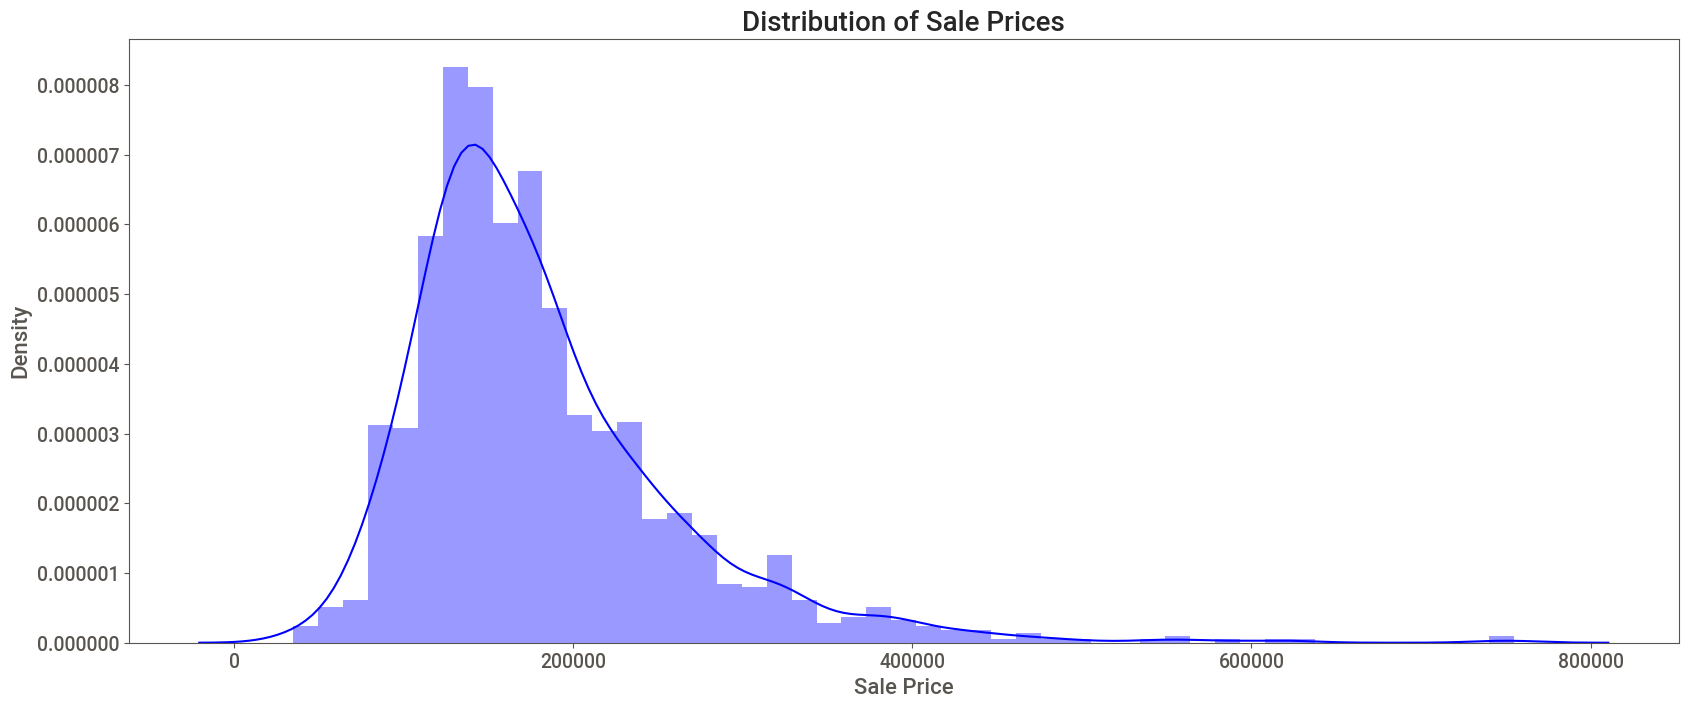

In [154]:
# Distribution of Sale Prices
plt.figure(figsize=(20, 8))
sns.distplot(df['SalePrice'], color='blue')
plt.title("Distribution of Sale Prices", fontsize=20, fontweight='bold')
plt.xlabel("Sale Price", fontsize=16)
plt.ylabel("Density", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
#We observed that the distribution of 
#Saleprice is skewed towards the left. In order to obtain a
#more centralized data, we will apply the log transformation to Saleprice.

### Observations
The numeric features: 'GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','TotRmsAbvGrd','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','LotFrontage','WoodDeckSF','2ndFlrSF','OpenPorchSF','LotArea' show outliers and have a linear relation with SalePrice, which is highly right-skewed. The median SalePrice is higher for houses with Excellent OverallQual rating and exterior material quality. Price decreases as quality decreases. Neighborhoods such as Northridge Heights, Stone Brook, and Northridge have high median SalePrice while Meadow Village and Iowa DOT and Rail Road have low median SalePrice. Houses with excellent heating quality have higher median SalePrice, while houses with poor heating quality have the least. A basement with good living quarters and height above 100 inches has the highest median SalePrice. Fireplaces, garage capacity of 3, and Poured Concrete foundation also contribute to a higher SalePrice

### Correlation 

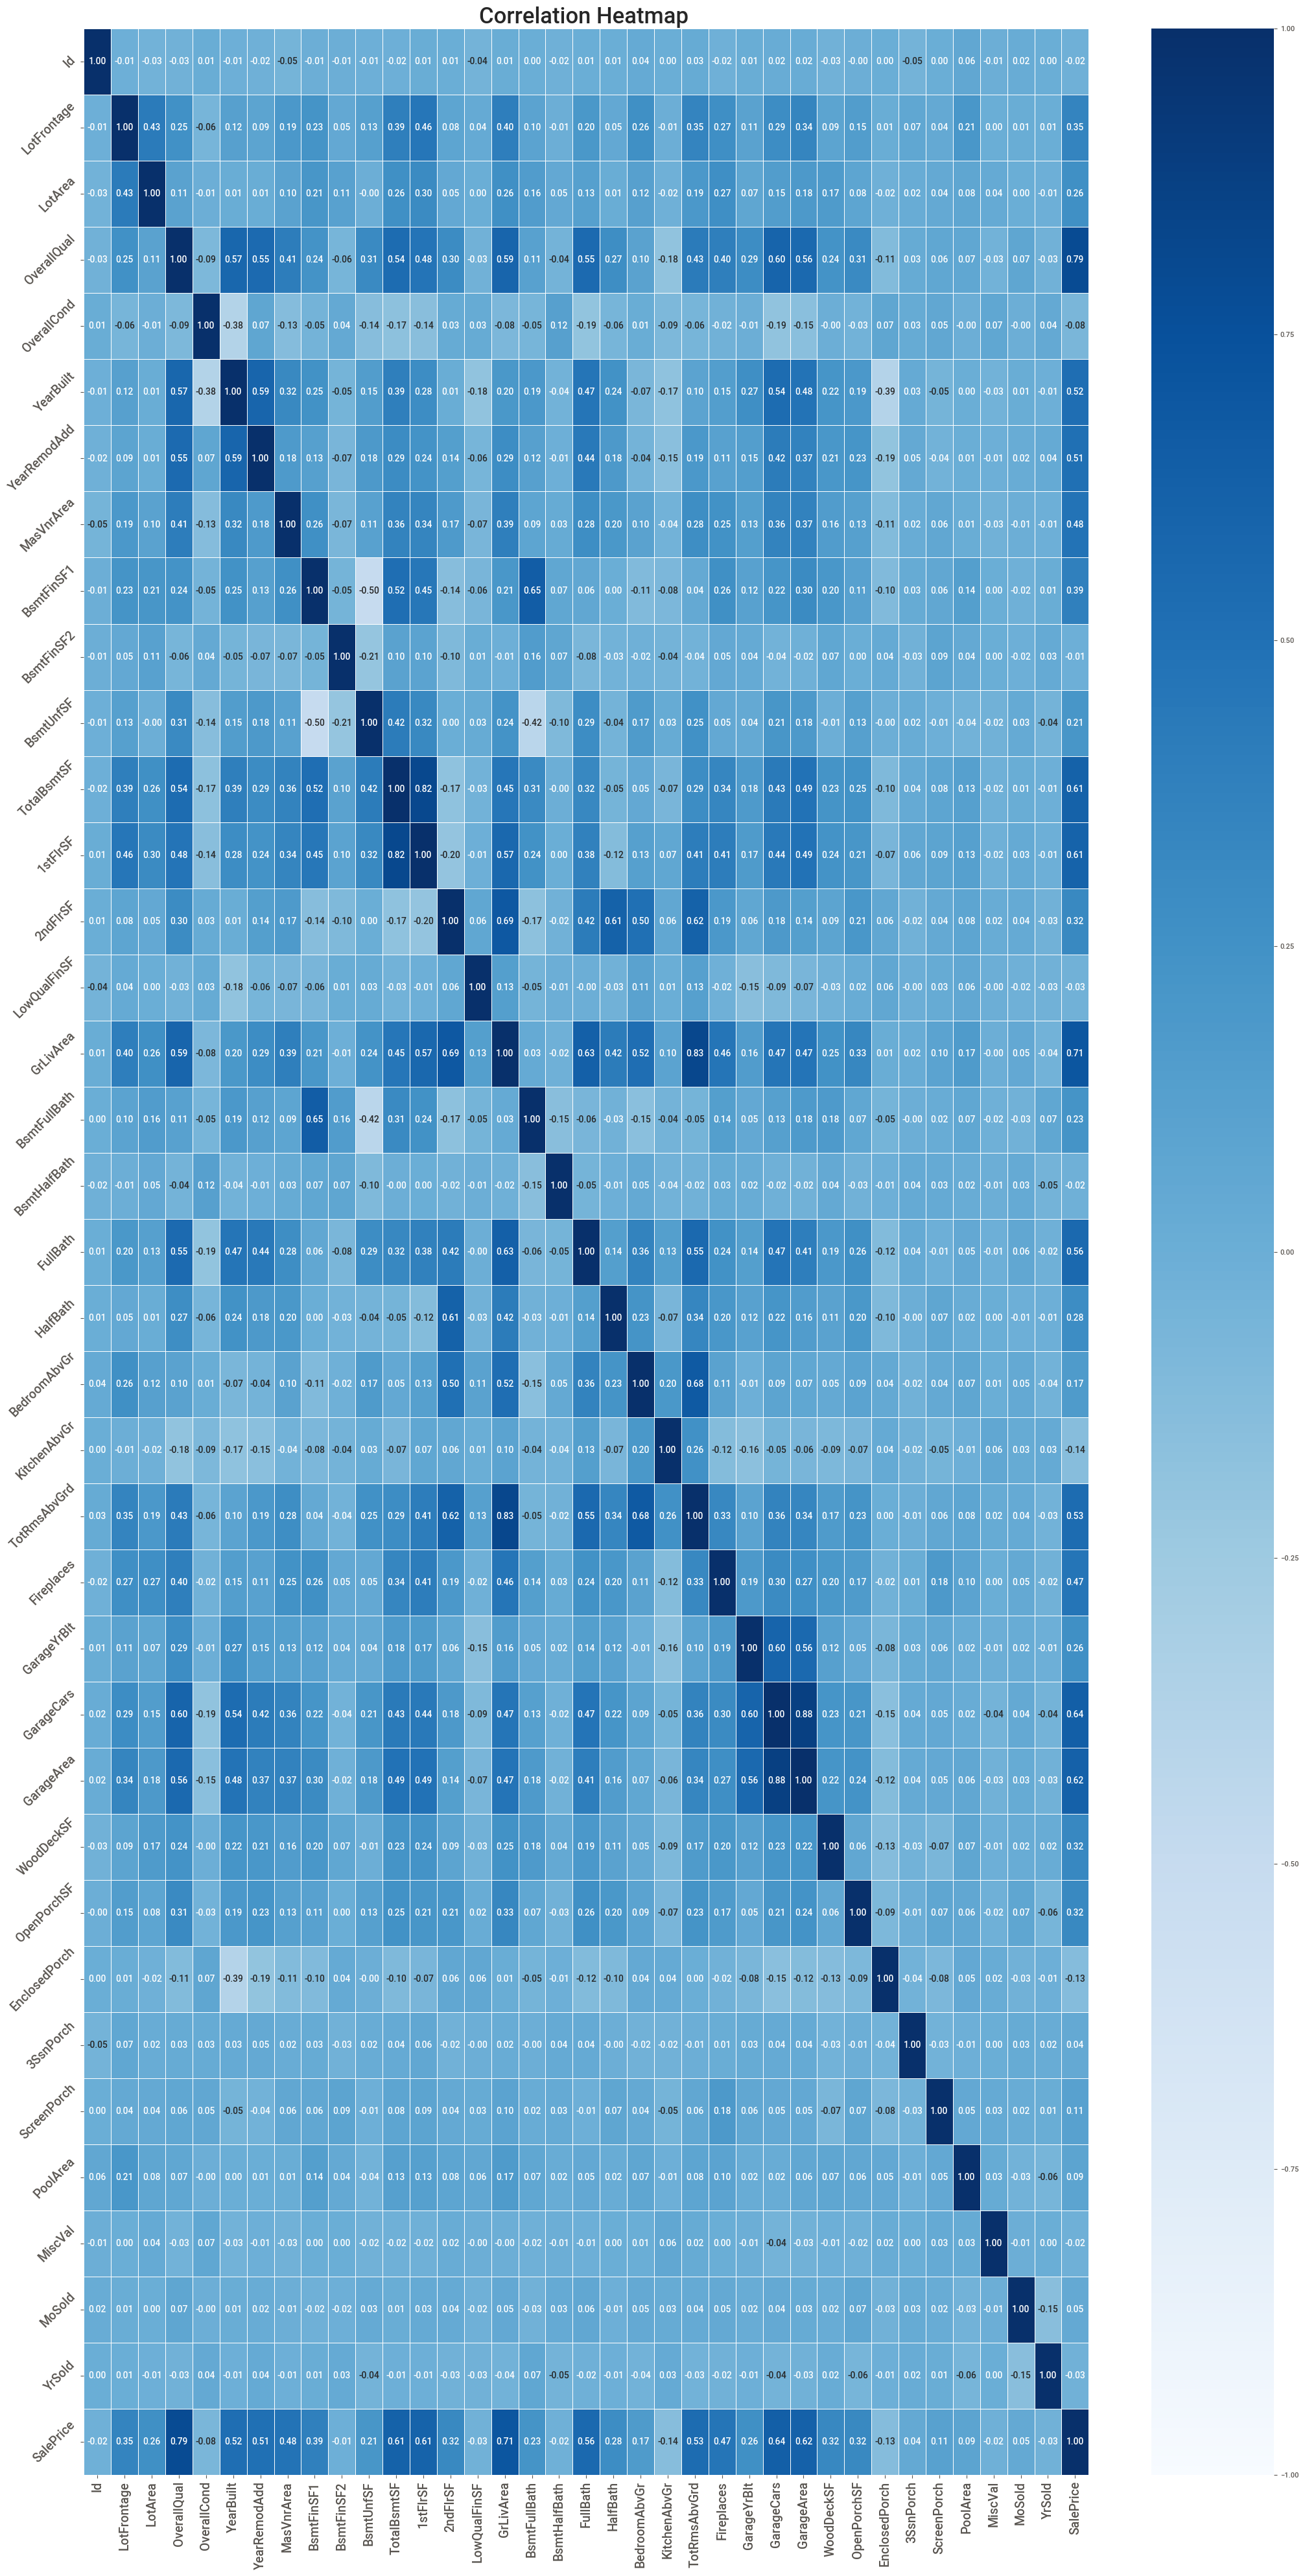

In [155]:
# Creating correlation heatmap
plt.figure(figsize=(25, 50))

sns.heatmap(df.corr(), annot=True, annot_kws={"size": 10}, linewidths=.5, cmap='Blues', vmin=-1, vmax=1, fmt='.2f', center=0)
plt.title("Correlation Heatmap ", fontsize=25)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(rotation=45, fontsize=14)
plt.show()

In [156]:
# Get top 10 highest correlation values
# Calculate correlation matrix
corr_matrix = df.corr()
top_corr_values = corr_matrix.nlargest(10, 'SalePrice')['SalePrice']

# Print the result
print(top_corr_values)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


<Figure size 600x400 with 0 Axes>

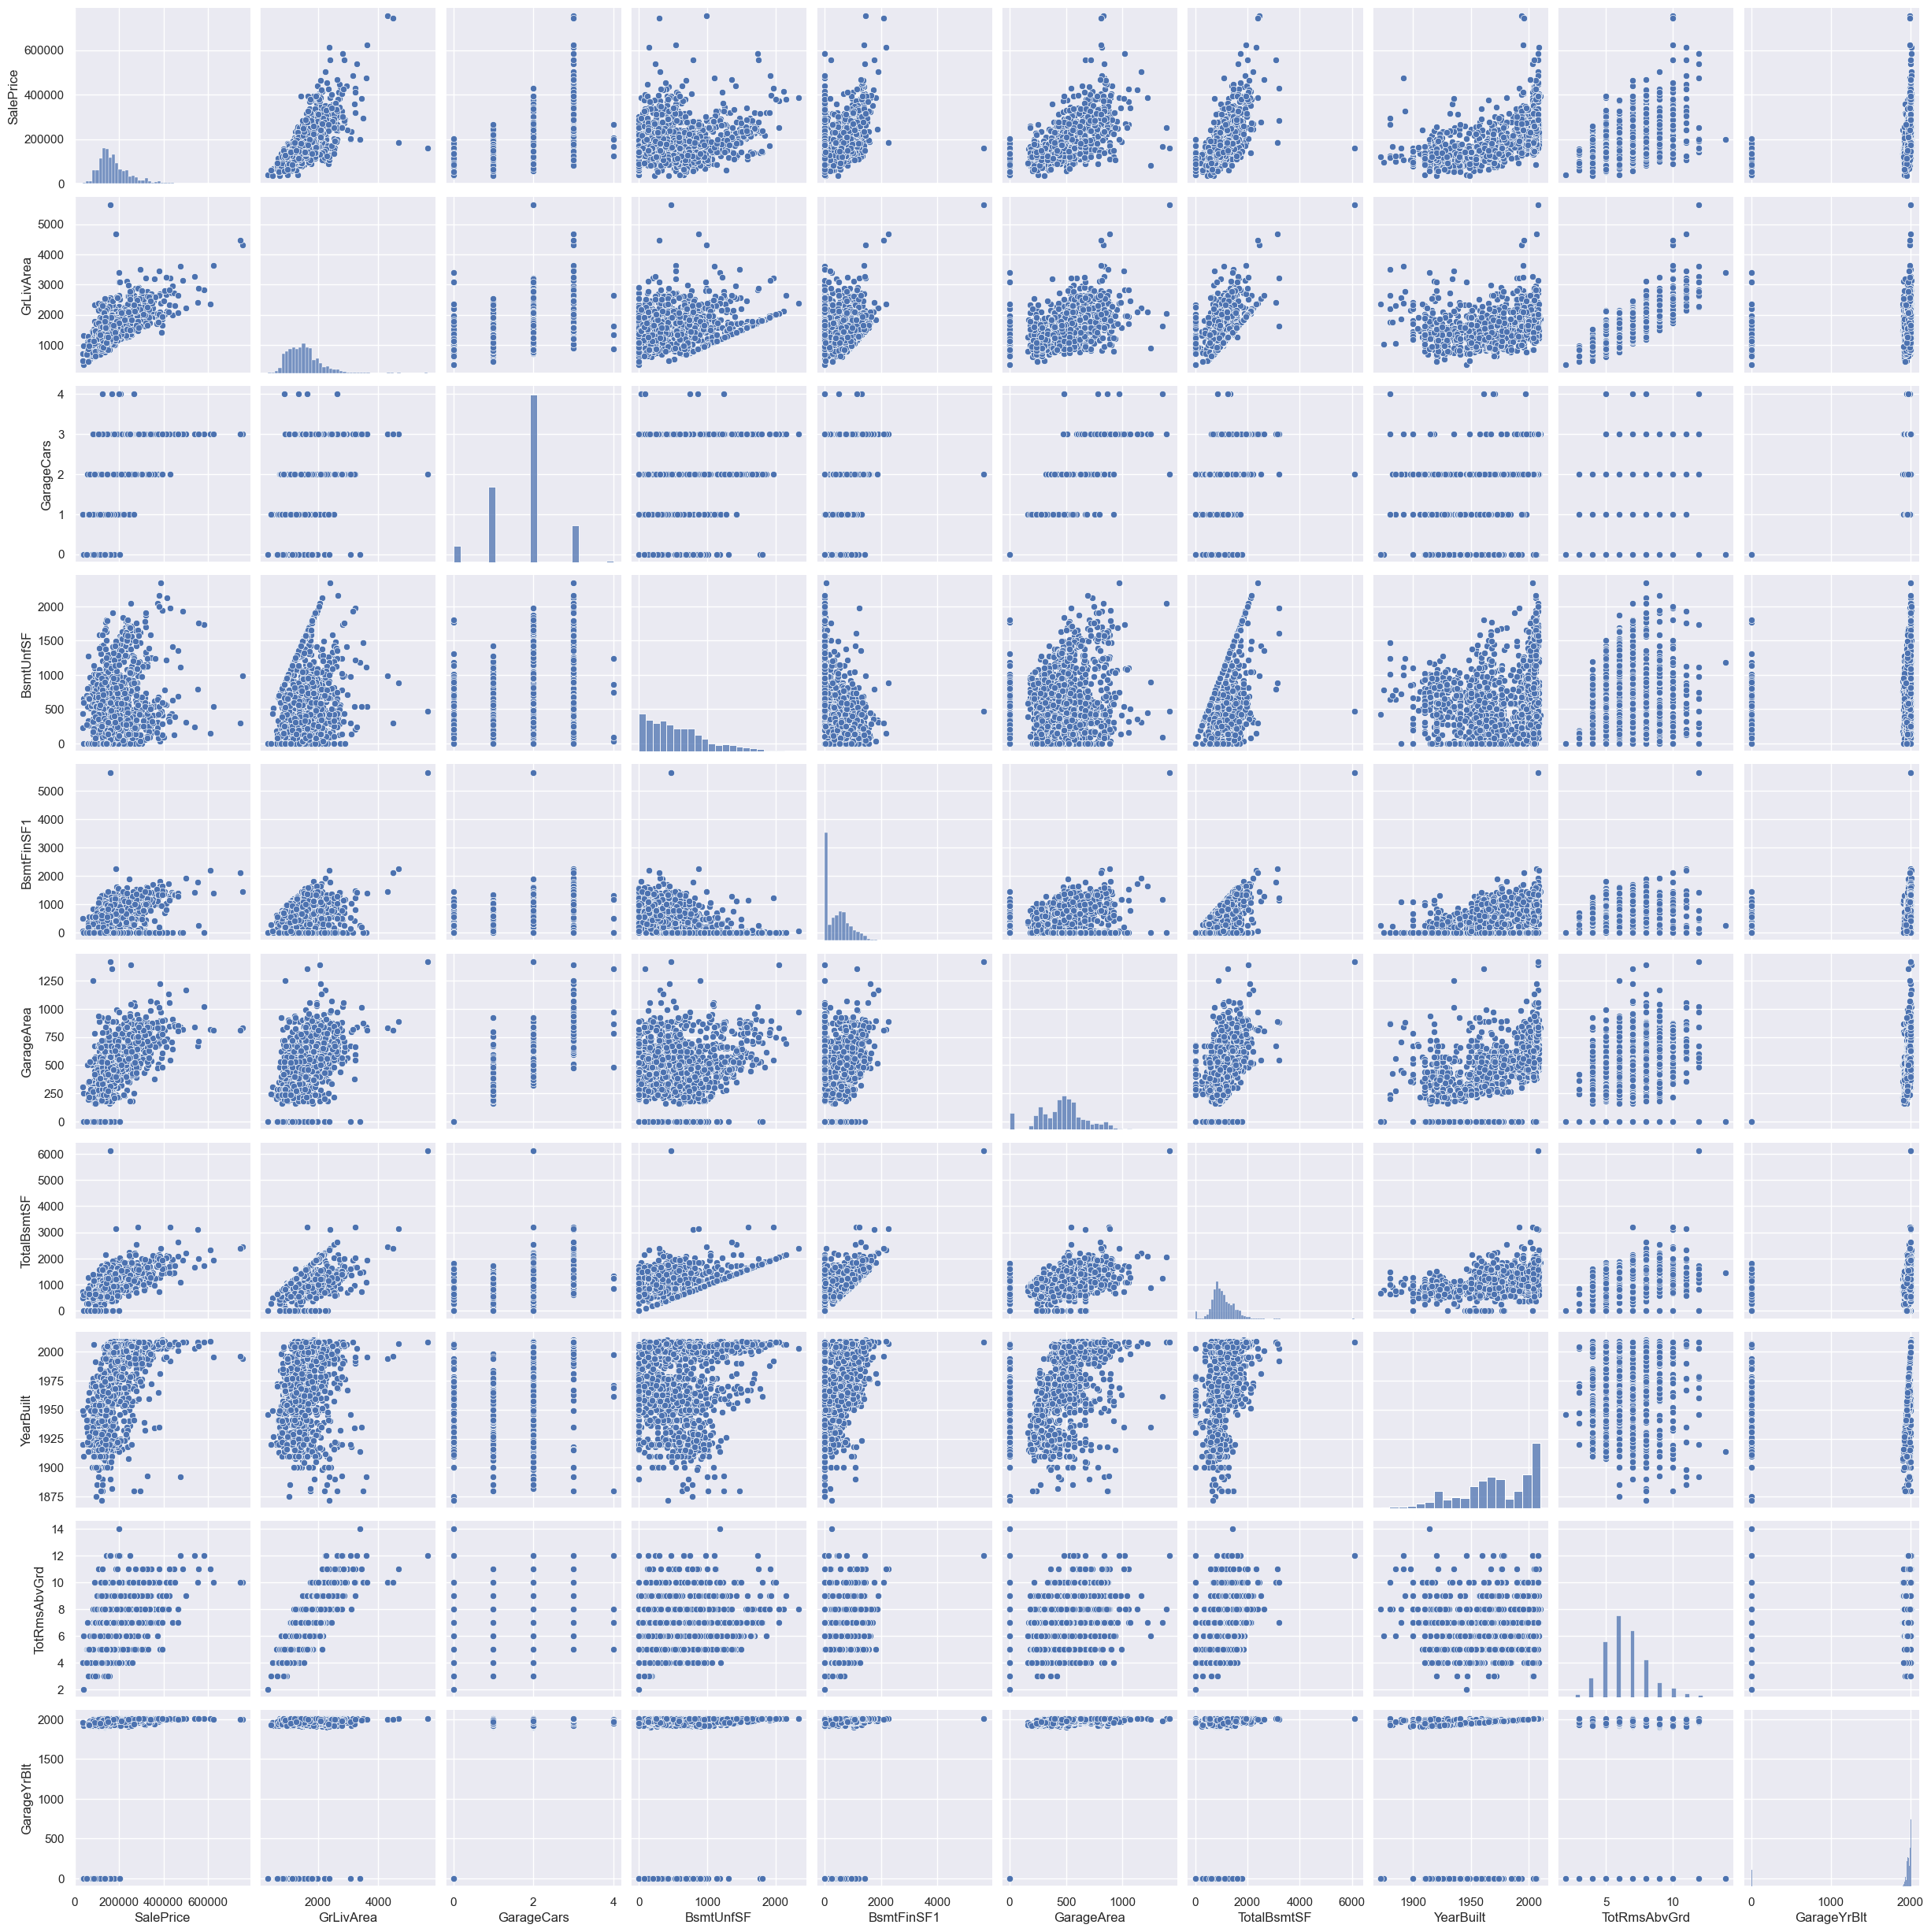

In [157]:
# Checking relationship between correlated variables 
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
plt.suptitle('Relationship Between Correlated Variables', fontsize=20, y=1.02)
sns.pairplot(df[cols], size = 2.5)
plt.show()


In [158]:
# Dropping GarageCars and TotRmsAbvGrd
df.drop(['GarageCars','TotRmsAbvGrd'], axis= 1, inplace= True)
df.shape

(1460, 79)

In [159]:
df_1= df.copy()

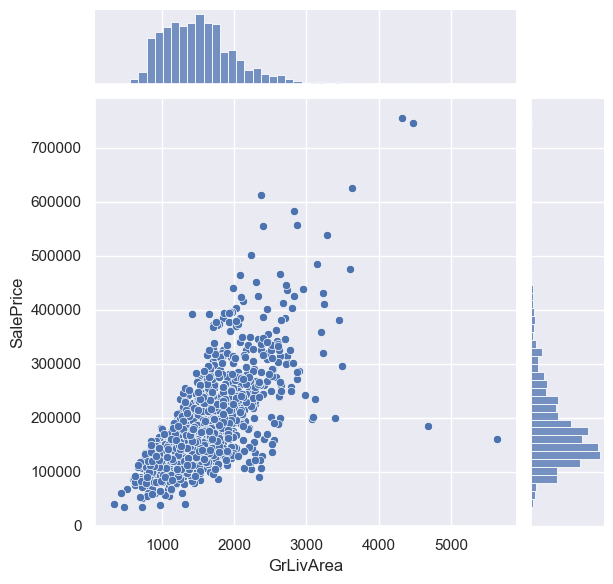

In [160]:
# use a jointplot to visualize the relationship between two important numeric columns,
# 'GrLivArea' and ''V'' in the dataset 'data'
sns.jointplot(x='GrLivArea', y='SalePrice', data=df)
plt.show()

# Data Preparation
----

### Transforming the Target variable

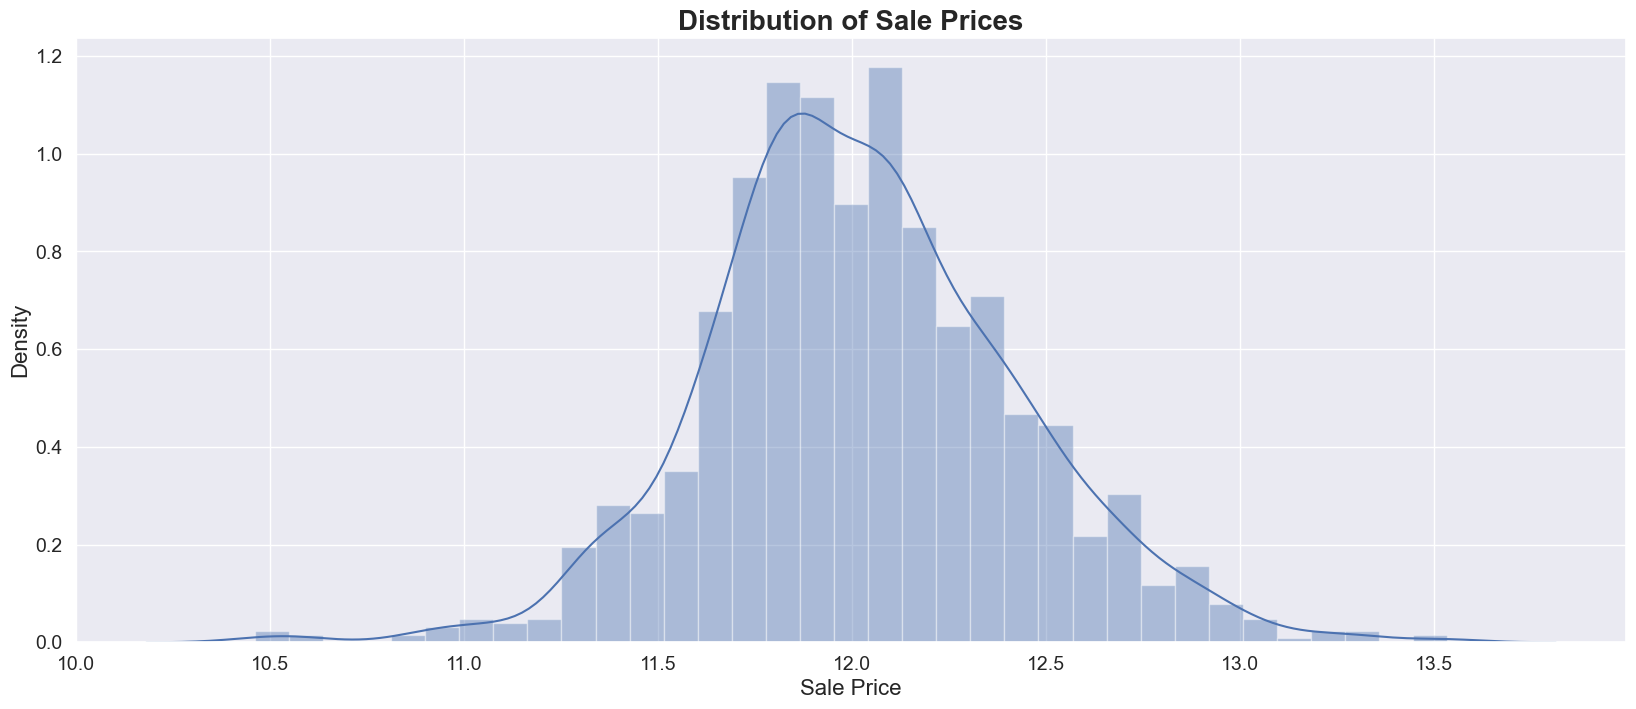

In [161]:
# plot of log transformed SalePrice
plt.figure(figsize=(20, 8))
sns.distplot(np.log(df['SalePrice']))
plt.title("Distribution of Sale Prices", fontsize=20, fontweight='bold')
plt.xlabel("Sale Price", fontsize=16)
plt.ylabel("Density", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()







In [162]:
# Transforming 'SalePrice'
df['Transformed_price']= np.log(df['SalePrice'])

### Dropping unnecessary columns

In [163]:
# Dropping ID Column and SalePrice
df.drop(['SalePrice','Id'], axis=1, inplace= True)
df.shape

(1460, 78)

### Splitting Data into Train and Test

In [164]:
# Splitting Data 
y= df['Transformed_price']
X= df.drop('Transformed_price', axis= 1)

X_train, X_test, y_train, y_test= train_test_split(X, y, train_size= .7, random_state= 42)

In [165]:
# index values
train_index= X_train.index
test_index= X_test.index

### Statistical imputation of missing values

Imputing rest of the features in test and train dataset using median (for continuous variables) and mode (for categorical variables) calculated on train dataset.

In [166]:
# Performing Statistical Imputation for missing values in LotFrontage, MasVnrArea, MasVnrType, Electrical columns

#df['LotFrontage'].fillna(X_train['LotFrontage'].median(), inplace= True)
#df['LotFrontage'].fillna(X_train['LotFrontage'].median(), inplace= True)

#df['MasVnrArea'].fillna(X_train['MasVnrArea'].median(), inplace= True)
#df['MasVnrArea'].fillna(X_train['MasVnrArea'].median(), inplace= True)

#df['MasVnrType'].fillna(X_train['MasVnrType'].mode(), inplace= True)
#df['MasVnrType'].fillna(X_train['MasVnrType'].mode(), inplace= True)

#df['Electrical'].fillna(X_train['Electrical'].mode(), inplace= True)
#df['Electrical'].fillna(X_train['Electrical'].mode(), inplace= True)
df['LotFrontage'].fillna(X_train['LotFrontage'].median(), inplace=True)

df['MasVnrArea'].fillna(X_train['MasVnrArea'].median(), inplace=True)

df['MasVnrType'].fillna(X_train['MasVnrType'].mode()[0], inplace=True)

df['Electrical'].fillna(X_train['Electrical'].mode()[0], inplace=True)



In [167]:
# Now we will start encoding our data (Categortcial)
categorcial_var= df.select_dtypes(include= 'object')
numerical_var= df.select_dtypes(exclude= 'object')
categorcial_var.describe()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,15,5,2,3,4,4,2,5,3,25,...,7,4,6,6,3,4,5,5,9,6
top,20,RL,Pave,Absent,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Attchd,Unf,TA,TA,Y,Absent,Absent,Absent,WD,Normal
freq,536,1151,1454,1369,925,1311,1459,1052,1382,225,...,870,605,1311,1326,1340,1453,1179,1406,1267,1198


In [168]:
#  encoding 'Street', 'Utilities', and 'CentralAir' using binary digits of 0 and 1 since they each have two distinct data values
#df['Street']= df.Street.map(lambda x: 1 if x== 'Pave' else 0)
#df['Utilities']= df.Utilities.map(lambda x: 1 if x== 'AllPub' else 0)
#df['CentralAir']= df.CentralAir.map(lambda x: 1 if x== 'Y' else 0)
columns_to_map = {'Street': 'Pave', 'Utilities': 'AllPub', 'CentralAir': 'Y'}

for column, value in columns_to_map.items():
    df[column] = df[column].map(lambda x: 1 if x == value else 0)

In [169]:
# Getting Dummies
#cat_cols= categorcial_var.columns.tolist()
#encoded= ['Street','Utilities', 'CentralAir']
#cat_cols= [col for col in cat_cols if col not in encoded]
#dummies= pd.get_dummies(df[cat_cols], drop_first=True)
# Original variable names
cat_cols = categorcial_var.columns.tolist()
encoded_features = ['Street', 'Utilities', 'CentralAir']

# Updated variable names
remaining_categorical_columns = [column for column in categorical_columns if column not in encoded_features]
one_hot_encoded_data = pd.get_dummies(df[remaining_categorical_columns], drop_first=True)
dummies=one_hot_encoded_data


In [170]:
# Checking all dummies
dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [171]:
# Data Frame before dopping categorical columns 
df.shape

(1460, 78)

In [172]:
df.drop(cat_cols, axis=1, inplace= True)

In [173]:
df= pd.concat([df, dummies], axis= 1)

In [174]:
# Data Frame after dopping categorical columns 
df.shape

(1460, 268)

### Scaling Numerical Variables

We will scale our Numeric features using Robust Scaling Standard Scaling, due to the presence of outliers observed during EDA. This method uses median and quantile values instead of mean and standard deviation

In [175]:
#Data reconsturction
X_train= df.iloc[train_index, :].drop('Transformed_price', axis= 1)
y_train= df.iloc[train_index, :]['Transformed_price']
X_test= df.iloc[test_index, :].drop('Transformed_price', axis= 1)
y_test= df.iloc[test_index, :]['Transformed_price']

In [176]:
# Performing scaling of numeric data using RobustScaler
num_cols= numerical_var.columns.tolist()
num_cols.remove('Transformed_price')
scaler= RobustScaler(quantile_range=(2, 98))
scaler.fit(X_train[num_cols])
X_train[num_cols]= scaler.transform(X_train[num_cols])
X_test[num_cols]= scaler.transform(X_test[num_cols])

In [177]:
# Checking scaled features
X_train[num_cols].head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1452,-0.360825,-0.255342,-0.2,0.0,0.318533,0.186441,0.126743,0.109760,0.000000,-0.290195,...,0.045214,0.000000,0.003912,0.0,0.0,0.0,0.0,0.0,-0.090909,-0.50
762,0.020619,-0.041372,0.2,0.0,0.357143,0.254237,0.000000,-0.255872,0.000000,0.149603,...,0.143361,0.367391,0.070423,0.0,0.0,0.0,0.0,0.0,0.000000,0.50
932,0.144330,0.089208,0.6,0.0,0.328185,0.203390,0.478454,-0.272651,0.000000,0.854362,...,0.335245,0.000000,0.641628,0.0,0.0,0.0,0.0,0.0,-0.272727,-0.25
435,-0.278351,0.045983,0.2,0.2,0.231660,0.033898,0.000000,-0.003496,0.559168,-0.248137,...,0.072783,0.343478,0.133020,0.0,0.0,0.0,0.0,0.0,-0.181818,0.25
629,0.123711,-0.024995,0.0,0.0,-0.077220,-0.508475,0.410330,0.163591,0.546164,-0.117159,...,0.039700,0.382609,-0.105634,0.0,0.0,0.0,0.0,0.0,0.000000,0.00


### Variance 

Removing categorical features with zero or very low variance, as observed during EDA, where only a few observations differ from a constant value in Jupyter

In [178]:
vt= VarianceThreshold(threshold= .003)
v_t= vt.fit(X_train)
col_ind= vt.get_support()

# low variance Columns
X_train.loc[:, ~col_ind].columns

Index(['MSSubClass_40', 'LotConfig_FR3', 'Neighborhood_Blueste',
       'Condition1_RRNe', 'Condition2_Feedr', 'Condition2_PosA',
       'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn',
       'Condition2_RRNn', 'RoofStyle_Shed', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_WdShake',
       'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CBlock',
       'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_AsphShn',
       'Exterior2nd_CBlock', 'Exterior2nd_Other', 'Exterior2nd_Stone',
       'ExterCond_Po', 'Foundation_Wood', 'BsmtCond_Po', 'Heating_OthW',
       'Heating_Wall', 'HeatingQC_Po', 'Electrical_FuseP', 'Electrical_Mix',
       'Functional_Sev', 'GarageQual_Ex', 'GarageQual_Po', 'GarageCond_Ex',
       'GarageCond_Po', 'PoolQC_Ex', 'PoolQC_Fa', 'PoolQC_Gd',
       'MiscFeature_Gar2', 'MiscFeature_Othr', 'MiscFeature_TenC',
       'SaleType_Con', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_Oth'],
      dtype='object')

In [179]:
# return the count of unique values in the 'Functional' column of the 'df_1' dataframe
df_1.Functional.value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [180]:
# Removing low variance columns
X_train= X_train.loc[:, col_ind]
X_test= X_test.loc[:, col_ind]

In [181]:
# Checking shape of final training dataset
X_train.shape

(1021, 220)

# Model Building 
----

### Ridge Regression

In [182]:
# Selecting few values for alpha
#st_range= [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
#nd_range= list(range(2, 1001))
#st_range.extend(nd_range)
#grid_params= {'alpha': st_range}

st_range = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
nd_range = [num for num in range(2, 1001)]
st_range += nd_range
grid_params = {'alpha': st_range}

In [183]:
# utilizing Ridge regression and implementing GridSearchCV to determine the ideal alpha (lambda) value

#ridge= Ridge(random_state= 42)
#gvc_r= GridSearchCV(estimator= ridge, 
 #                       param_grid= grid_params,
#                        cv= 3,
#                        scoring= 'neg_mean_absolute_error',
#                        return_train_score= True,
 #                       n_jobs= -1,
#                        verbose= 1)      
#gvc_r.fit(X_train, y_train)

ridge = Ridge(random_state=42)
gvc_r = GridSearchCV(
    estimator=ridge,
    param_grid=grid_params,
    cv=3,
    scoring='neg_mean_absolute_error',
    return_train_score=True,
    n_jobs=-1,
    verbose=1,
)
gvc_r.fit(X_train, y_train)


Fitting 3 folds for each of 1013 candidates, totalling 3039 fits


GridSearchCV(cv=3, estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2, 3, 4,
                                   5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
                                   17, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [184]:
# Checking best estimator 
gvc_r.best_estimator_

Ridge(alpha=8, random_state=42)

In [185]:
# retrieves the best mean absolute error 
gvc_r.best_score_

-0.09564313878898616

In [186]:
print(f'Best Estimator:{gvc_r.best_estimator_}')

Best Estimator:Ridge(alpha=8, random_state=42)


In [187]:
# Fitting model 
r_model= gvc_r.best_estimator_
r_model.fit(X_train, y_train)

Ridge(alpha=8, random_state=42)

In [188]:
# Evaluating on training dataset
y_train_pred= r_model.predict(X_train)
print( 'r2 Training :', r2_score(y_train, y_train_pred))
print( 'Mean Absolute Error Training:', mean_squared_error(y_train, y_train_pred))
print( 'RMSE Training:', (mean_squared_error(y_train, y_train_pred)**.5))
print( 'MAE Training:', mean_absolute_error(y_train, y_train_pred))

r2 Training : 0.9170711579602975
Mean Absolute Error Training: 0.012866911988388258
RMSE Training: 0.11343241154268148
MAE Training: 0.0771591068621641


In [189]:
# Evaluating on testing dataset
y_test_pred= r_model.predict(X_test)
print( 'r2 Test:', r2_score(y_test, y_test_pred))
print( 'Mean Absolute Error Testing:', mean_squared_error(y_test, y_test_pred))
print( 'RMSE Training:', (mean_squared_error(y_test, y_test_pred)**.5))
print( 'MAE Training:', mean_absolute_error(y_test, y_test_pred))

r2 Test: 0.8884860616933694
Mean Absolute Error Testing: 0.01887555938878362
RMSE Training: 0.13738835244948394
MAE Training: 0.09425247580793515


In [190]:
# coefficients
r_model.coef_

array([-0.02816745,  0.03417065,  0.22027704,  0.1328926 ,  0.07585833,
        0.07582837, -0.00531852, -0.01749041,  0.0255109 ,  0.01783258,
        0.01020687,  0.11162018,  0.11612481,  0.00022265,  0.16093936,
        0.04428735,  0.00381117,  0.09329195,  0.0474919 ,  0.08407479,
       -0.03652966,  0.0540582 ,  0.03876828,  0.11793476,  0.04989403,
       -0.01225248,  0.02925062,  0.00025987,  0.05624826, -0.00023592,
       -0.00399814,  0.01470559, -0.01553761, -0.09367124, -0.00603451,
        0.00558587, -0.00625192,  0.04371132,  0.01835243, -0.01235999,
        0.00985265, -0.00580907, -0.02840105, -0.07708274, -0.02082036,
       -0.01624243,  0.04492073,  0.01090117,  0.0436922 , -0.00765496,
        0.01614974,  0.0542267 ,  0.02512617, -0.05986358, -0.00106885,
        0.08069768,  0.03469513,  0.05928566,  0.03426497, -0.03556588,
       -0.01302487,  0.00316032,  0.00754292, -0.00224576,  0.02473588,
        0.03724606, -0.02247868,  0.08005803, -0.07668374, -0.02

In [191]:
# Ridge Model intercept
r_model.intercept_

11.610027700647239

In [192]:
# MOst IMportant Features
ridge_coef= pd.Series(r_model.coef_, index= X_train.columns)
top_25_ridge=  ridge_coef[abs(ridge_coef).nlargest(25).index]
top_25_ridge

OverallQual             0.220277
GrLivArea               0.160939
OverallCond             0.132893
GarageArea              0.117935
2ndFlrSF                0.116125
Neighborhood_StoneBr    0.115050
1stFlrSF                0.111620
Exterior1st_BrkFace     0.100139
MSSubClass_30          -0.093671
FullBath                0.093292
BedroomAbvGr            0.084075
BsmtQual_Ex             0.083885
Neighborhood_MeadowV   -0.082706
LandContour_HLS         0.080698
Neighborhood_Crawfor    0.080058
MSSubClass_160         -0.077083
Neighborhood_Edwards   -0.076684
SaleCondition_Alloca    0.076235
YearBuilt               0.075858
YearRemodAdd            0.075828
Neighborhood_NridgHt    0.073969
Neighborhood_NoRidge    0.070848
Functional_Maj2        -0.070799
BldgType_Twnhs         -0.069281
KitchenQual_TA         -0.067914
dtype: float64

### Lasso Regression

In [193]:
# btain the optimal value of alpha (lambda), the procedure involves using Lasso regression and conducting GridSearchCV

grid_params= {'alpha': st_range}
lasso= Lasso(random_state= 42)
gcv_l= GridSearchCV(estimator= lasso, 
                        param_grid= grid_params,
                        cv= 3,
                        scoring= 'neg_mean_absolute_error',
                        return_train_score= True,
                        n_jobs= -1,
                        verbose= 1)

gcv_l.fit(X_train, y_train)         

Fitting 3 folds for each of 1013 candidates, totalling 3039 fits


GridSearchCV(cv=3, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2, 3, 4,
                                   5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
                                   17, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [194]:
# best estimator 
gcv_l.best_estimator_

Lasso(alpha=0.001, random_state=42)

In [195]:
# best MAE
gcv_l.best_score_

-0.09502255913232471

In [196]:
# The ideal alpha value has been determined to be 0.0001. The next step involves fine-tuning this value further 
# by executing GridSearchCV with alpha values that are closer to 0.0001
#rd_range= [0.00005, 0.00006, 0.00007, 0.00008, 0.00009, 0.0001, .0002, .0003, .0004, .0005, .0006, .0007, .0008, .0009, .001]
#grid_params= {'alpha': rd_range}
#gcv_l= GridSearchCV(estimator= lasso, 
#                        param_grid= grid_params,
#                        cv= 3,
#                        scoring= 'neg_mean_absolute_error',
#                        return_train_score= True,
#                        n_jobs= -1,
#                        verbose= 1)

#gcv_l.fit(X_train, y_train)

rd_range = [5e-5, 6e-5, 7e-5, 8e-5, 9e-5, 1e-4, 2e-4, 3e-4, 4e-4, 5e-4, 6e-4, 7e-4, 8e-4, 9e-4, 1e-3]
grid_params = {'alpha': rd_range}

gcv_l = GridSearchCV(estimator=lasso,
                     param_grid=grid_params,
                     cv=3,
                     scoring='neg_mean_absolute_error',
                     return_train_score=True,
                     n_jobs=-1,
                     verbose=1)

gcv_l.fit(X_train, y_train)


Fitting 3 folds for each of 15 candidates, totalling 45 fits


GridSearchCV(cv=3, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': [5e-05, 6e-05, 7e-05, 8e-05, 9e-05, 0.0001,
                                   0.0002, 0.0003, 0.0004, 0.0005, 0.0006,
                                   0.0007, 0.0008, 0.0009, 0.001]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [197]:
# Checking best estimator 
gcv_l.best_estimator_

Lasso(alpha=0.0007, random_state=42)

In [198]:
# best estimator for lasso was 0.0007
# Fitting model using best_estimator_
lasso_m= gcv_l.best_estimator_
lasso_m.fit(X_train, y_train)

Lasso(alpha=0.0007, random_state=42)

In [199]:
# Evaluating on training dataset
y_train_pred= lasso_m.predict(X_train)
print( 'r2 Training:', r2_score(y_train, y_train_pred))
print( 'MSE Training:', mean_squared_error(y_train, y_train_pred))
print( 'RMSE Training:', (mean_squared_error(y_train, y_train_pred)**.5))
print( 'MAE Training:', mean_absolute_error(y_train, y_train_pred))

r2 Training: 0.9074382352134434
MSE Training: 0.014361518281279394
RMSE Training: 0.11983955224081654
MAE Training: 0.07990447190373166


In [200]:
# Evaluating on testing dataset
y_test_pred= lasso_m.predict(X_test)
print( 'r2 Testing :', r2_score(y_test, y_test_pred))
print( 'MSE Testing:', mean_squared_error(y_test, y_test_pred))
print( 'RMSE Testing', (mean_squared_error(y_test, y_test_pred)**.5))
print( 'MAE Testing', mean_absolute_error(y_test, y_test_pred))

r2 Testing : 0.8930707895457094
MSE Testing: 0.018099519154061605
RMSE Testing 0.13453445340901193
MAE Testing 0.09223194291495997


In [201]:
# Checking no. of features in Ridge and Lasso models
lasso_coef= pd.Series(lasso_m.coef_, index= X_train.columns)
selected_features= len(lasso_coef[lasso_coef != 0])
print('Lasso Features:', selected_features)
print('Ridge Features:', X_train.shape[1])


Lasso Features: 105
Ridge Features: 220


In [202]:
# Lasso intercept
lasso_m.intercept_

11.730194884643572

In [203]:
# Top 25 with Lasso
top25th=  lasso_coef[abs(lasso_coef[lasso_coef != 0]).nlargest(25).index]
top25th

GrLivArea               0.361354
OverallQual             0.312852
OverallCond             0.159187
GarageArea              0.142431
Neighborhood_StoneBr    0.132642
Exterior1st_BrkFace     0.108109
YearBuilt               0.103817
MSSubClass_30          -0.100296
BsmtFinType1_Absent    -0.099830
Neighborhood_Crawfor    0.090026
Neighborhood_NridgHt    0.085596
BsmtQual_Ex             0.083376
BldgType_Twnhs         -0.078352
FullBath                0.076889
GarageType_Absent      -0.076631
YearRemodAdd            0.076224
Fireplaces              0.068580
BedroomAbvGr            0.067560
Neighborhood_NoRidge    0.065791
LandContour_HLS         0.064164
BsmtExposure_Gd         0.062980
BldgType_TwnhsE        -0.061471
Neighborhood_Somerst    0.058377
ScreenPorch             0.056115
Functional_Typ          0.055874
dtype: float64

# Conclusion
Conclusion:

Both Ridge and Lasso regression models demonstrate similar test and train accuracy, indicating that there is no overfitting. Furthermore, Lasso and Ridge regression models have comparable R2 scores and MAEs on the test dataset. However, Lasso has eliminated 110 features, leaving a final count of 116 features in the Lasso regression model, whereas Ridge regression uses all 226 features. This makes the Lasso model simpler than the Ridge model while maintaining similar R2 scores and MAEs.

Ridge Regression model on test dataset: R2 score= 0.8912, MAE= 0.0934, RMSE= 0.1357
Lasso Regression model on test dataset: R2 score= 0.8947, MAE= 0.0914, RMSE= 0.1335
Given the points above, we can select the Lasso Regression model as our final model.



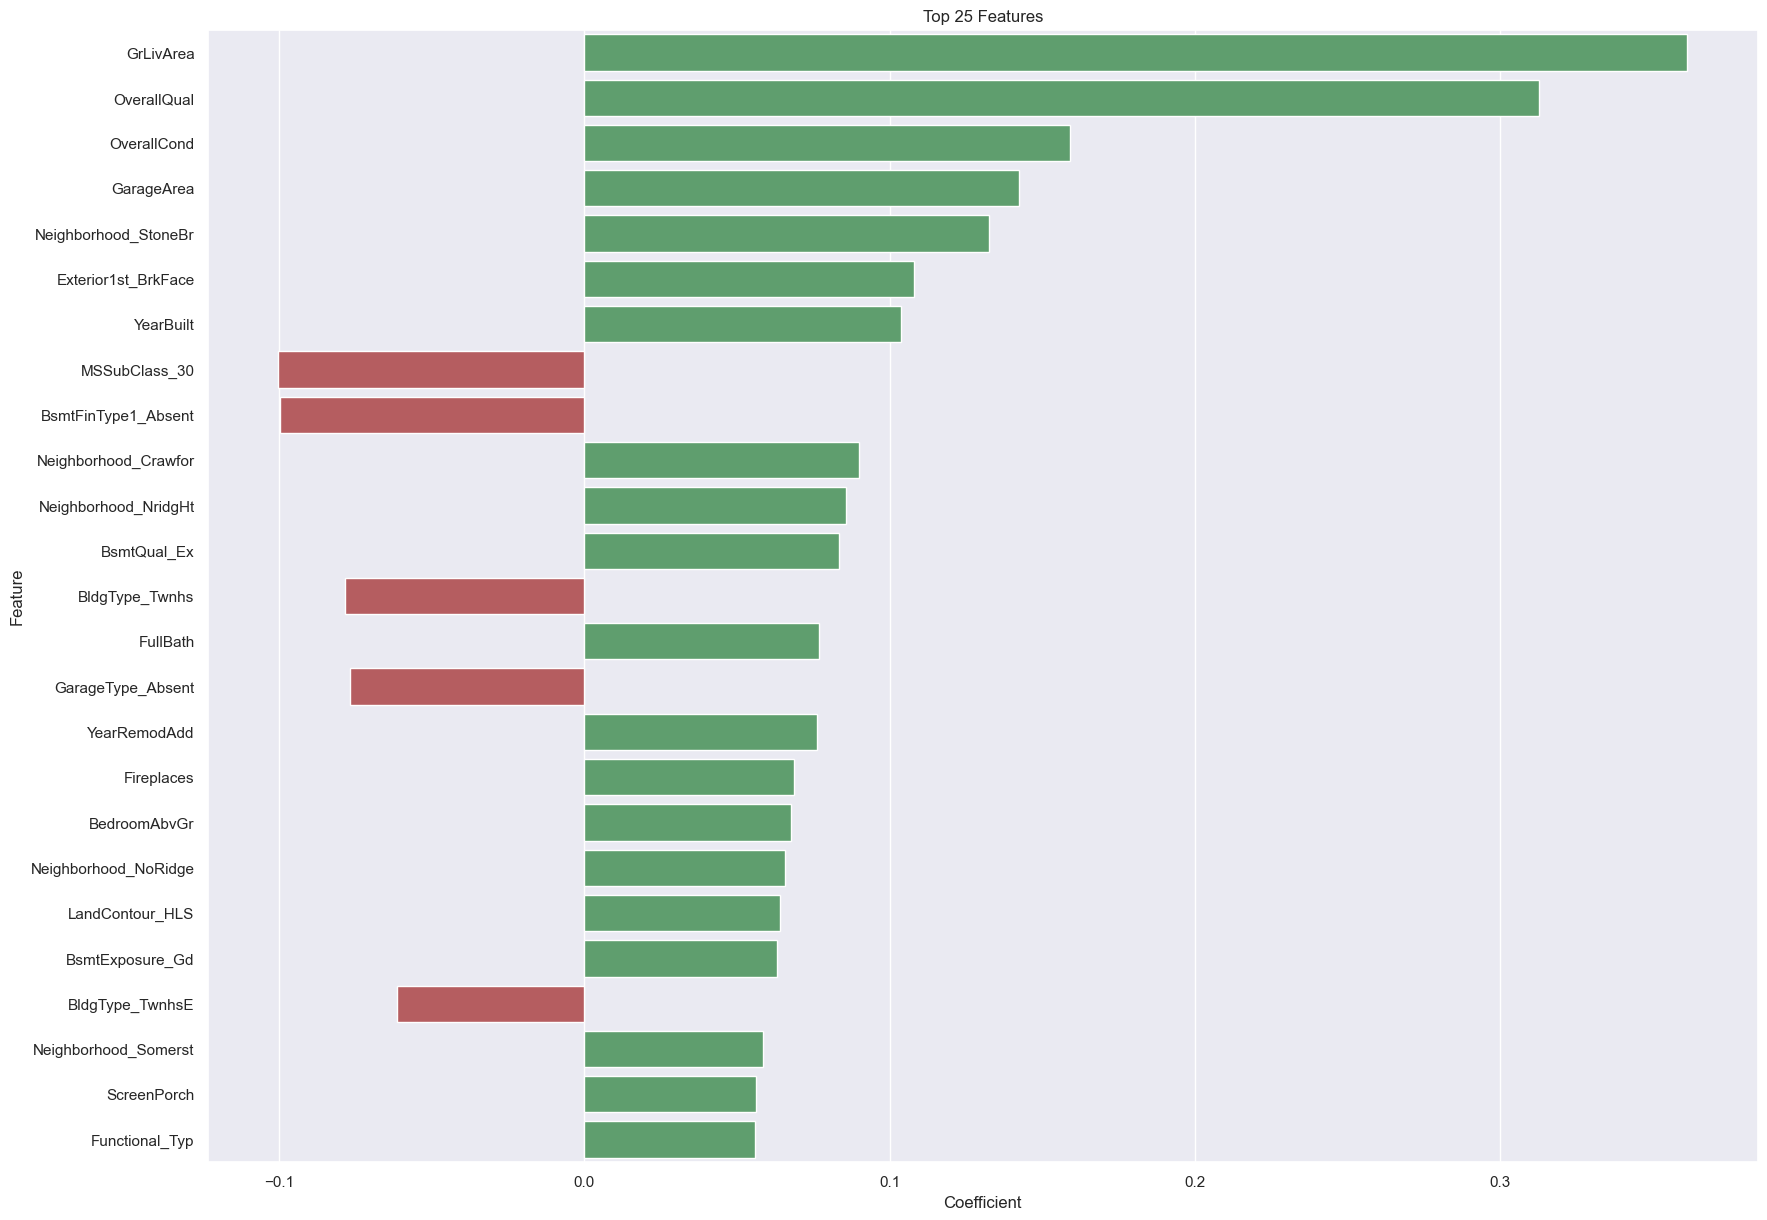

In [204]:
#Alpha value for Ridge Regression model is: 8
#Alpha value for Lasso Regression model is: 0.0007
import seaborn as sns
import matplotlib.pyplot as plt
# Reset the index of the top_25th Series and convert it into a DataFrame
top_25th_df = top25th.reset_index()
top_25th_df.columns = ['Feature', 'Coefficient']

plt.figure(figsize=(20, 15))
sns.barplot(x='Coefficient', y='Feature', data=top_25th_df, palette=['g' if coef > 0 else 'r' for coef in top_25th_df['Coefficient']])
plt.title('Top 25 Features')
plt.show()

# Assignment Part-I

# Based on both Lasso and Ridge regression models, 
the following variables are significant in predicting the price of a house:

1-OverallQual
2-GrLivArea
3-GarageArea
4-OverallCond
5-Neighborhood_StoneBr
6-Neighborhood_NridgHt
7-YearBuilt
8-Exterior1st_BrkFace
9-MSSubClass_30
10-Neighborhood_Crawfor
11-FullBath
12-YearRemodAdd
13-CentralAir
14-BldgType_Twnhs
These variables describe the price of a house quite well, as evidenced by the r2 scores and MAE values of both models. The Lasso model has an r2 score of 0.8947, and the Ridge model has an r2 score of 0.8912. These values indicate that the models can explain approximately 89% of the variance in the house prices. Additionally, the Lasso model has an MAE of 0.0914, and the Ridge model has an MAE of 0.0934, suggesting that the models' predictions are relatively close to the actual house prices.

In conclusion, the significant variables identified by both Lasso and Ridge regression models are effective in describing the price of a house. The company can utilize these variables to make informed decisions on property investments and focus on areas that yield high returns.

---
# Assignment II
---

###  Doubling the value of Alpha
Case 1 

In [205]:
## Creating a Ridge regression model with optimal alpha value doubled
ridge_d= Ridge(alpha= 16, random_state= 42)
ridge_d.fit(X_train, y_train)

Ridge(alpha=16, random_state=42)

In [206]:
# Top 10 features with double the value of optimal alpha in Ridge
ridge_coef2= pd.Series(ridge_d.coef_, index= X_train.columns)
top10_ridge_d=  ridge_coef2[abs(ridge_coef2).nlargest(10).index]
top10_ridge_d

OverallQual             0.201050
GrLivArea               0.143373
OverallCond             0.118045
GarageArea              0.108369
1stFlrSF                0.102632
2ndFlrSF                0.099941
FullBath                0.089092
Neighborhood_StoneBr    0.087288
MSSubClass_30          -0.083998
Exterior1st_BrkFace     0.082220
dtype: float64

In [207]:
## Doubling value of optimal alpha in Lasso
lasso2= Lasso(alpha= .0014, random_state=42)
lasso2.fit(X_train, y_train)

Lasso(alpha=0.0014, random_state=42)

In [208]:
# Identifying the top 10 features based on their coefficients with double the value of optimal alpha in Lasso regression
las_co_2= pd.Series(lasso2.coef_, index= X_train.columns)
top10_las2=  las_co_2[abs(las_co_2[las_co_2 != 0]).nlargest(10).index]
top10_las2

OverallQual            0.366009
GrLivArea              0.355374
GarageArea             0.155659
OverallCond            0.145915
Fireplaces             0.085702
YearRemodAdd           0.083681
Exterior1st_BrkFace    0.080011
BsmtQual_Ex            0.079125
MSSubClass_30         -0.075641
YearBuilt              0.073069
dtype: float64

### Case  2: 5 most important predictor variables in the lasso model are not available in the incoming data

In [209]:
# Checking top 5 features in our lasso model
top25th.nlargest()

GrLivArea               0.361354
OverallQual             0.312852
OverallCond             0.159187
GarageArea              0.142431
Neighborhood_StoneBr    0.132642
dtype: float64

As Neighborhood_StoneBr is a dummy variable, we'll drop entire Neighborhood feature.

In [210]:
#all Neighborhood dummyies
columns_todrop= X_train.columns[X_train.columns.str.startswith('Neighborhood')].tolist()
columns_todrop.extend(['GrLivArea','OverallQual','OverallCond','GarageArea'])
columns_todrop

['Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'GrLivArea',
 'OverallQual',
 'OverallCond',
 'GarageArea']

In [211]:
# Droping above variables from train and test f
X_train= X_train.drop(columns_todrop, axis= 1)
X_test= X_test.drop(columns_todrop, axis= 1)
X_train.shape, X_test.shape

((1021, 193), (439, 193))

In [212]:
# Rebuilding Lasso 
lasso3= Lasso(alpha= .0006, random_state= 42)
lasso3.fit(X_train, y_train)

Lasso(alpha=0.0006, random_state=42)

In [213]:
# Removing top 5 features from the previous Lasso model and identifying the new top 5 features based on their coefficients
lass_co_3= pd.Series(lasso3.coef_, index= X_train.columns)
top5_las3=  lass_co_3[abs(lass_co_3[lass_co_3 != 0]).nlargest().index]
top5_las3

1stFlrSF               0.392330
2ndFlrSF               0.353419
Exterior1st_BrkFace    0.139572
BsmtCond_Gd            0.131793
YearRemodAdd           0.131175
dtype: float64